In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
bbc= pd.read_csv("bbc-text.csv")
bbc.category = bbc.category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4})
print(bbc)

      category                                               text
0            0  tv future in the hands of viewers with home th...
1            1  worldcom boss  left books alone  former worldc...
2            2  tigers wary of farrell  gamble  leicester say ...
3            2  yeading face newcastle in fa cup premiership s...
4            3  ocean s twelve raids box office ocean s twelve...
...        ...                                                ...
2220         1  cars pull down us retail figures us retail sal...
2221         4  kilroy unveils immigration policy ex-chatshow ...
2222         3  rem announce new glasgow concert us band rem h...
2223         4  how political squabbles snowball it s become c...
2224         2  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]


In [3]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [4]:
tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(),
                                strip_accents = 'unicode', # works 
                                stop_words = 'english', # works
                                lowercase = True, # works
                                max_df = 0.5, # works
                                min_df = 10) # works

In [5]:
X_train, X_test, y_train, y_test = train_test_split(bbc.text, bbc.category, train_size = 0.7, random_state = 1)
tf_vectorizer.fit(X_train)
X_transformed = tf_vectorizer.transform(X_train)
X_test_transformed = tf_vectorizer.transform(X_test)

c:\users\recep\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
c:\users\recep\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [12]:
accuracy={'MNB':0,'SVC':0}
precision={'MNB':0,'SVC':0}
f1={'MNB':0,'SVC':0}

In [13]:
clf_models={
            'MNB':MultinomialNB(),
            'SVC':SVC(decision_function_shape='ovo')
           }

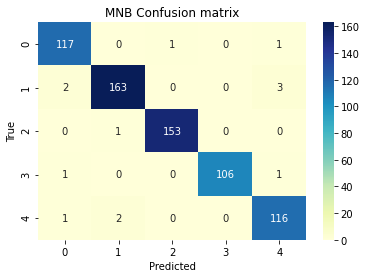

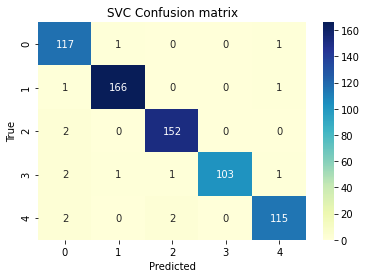

In [14]:
for key in clf_models.keys():
    clf=clf_models[key]
    clf.fit(X_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    
    cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
    labels = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("bottom")
    plt.title(key+' Confusion matrix')
    plt.ylabel('True')
    plt.xlabel('Predicted')

    accuracy[key]=metrics.accuracy_score(y_test,y_pred)
    precision[key]=metrics.precision_score(y_test,y_pred,average='macro')
    f1[key]=metrics.f1_score(y_test,y_pred,average='macro')
    print("")

In [15]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1 Score: ", f1)

Accuracy:  {'MNB': 0.9805389221556886, 'SVC': 0.9775449101796407}
Precision:  {'MNB': 0.9802108078121222, 'SVC': 0.9773730115337551}
F1 Score:  {'MNB': 0.9803750539944508, 'SVC': 0.9763288847682761}


In [16]:
def Plot(p_metric,p_values):    
    columns=p_values.keys()
    values=list(p_values.values())
    y_pos = np.arange(len(columns))

    plt.bar(y_pos, values, align='center', alpha=0.5,color=["red","blue"])
    plt.xticks(y_pos, columns)
    title=p_metric+' Score'
    plt.title(title)
    
    plt.figtext(0.5, 0.001, str(p_values), ha="center", fontsize=16)
    plt.show()

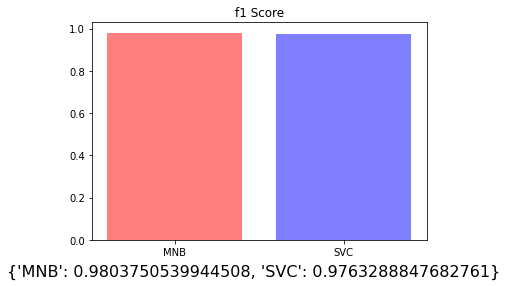

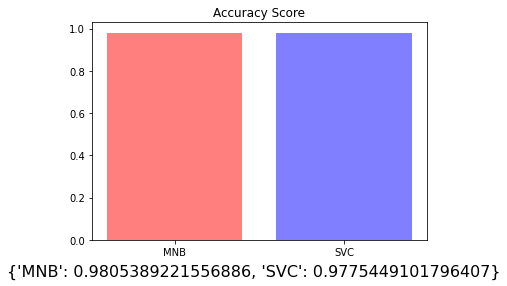

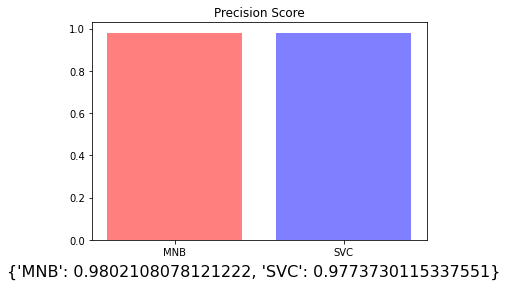

In [17]:
Plot("f1",f1)
Plot("Accuracy",accuracy)
Plot("Precision",precision)